# exp 6.영화리뷰 텍스트 감성분석

학습 목표
***
* 텍스트 데이터를 머신러닝 입출력용 수치데이터로 변환하는 과정을 이해한다.
* RNN의 특징을 이해하고 시퀀셜한 데이터를 다루는 방법을 이해한다.
* 1-D CNN으로도 텍스트를 처리할 수 있음을 이해한다.
* IMDB와 네이버 영화리뷰 데이터셋을 이용한 영화리뷰 감성 분류 실습을 진행한다.

## 6-2. 텍스트 감정분석의 유용성

딥러닝을 통해 IMDb나 네이버 영화 리뷰 텍스트에 담긴 이용자의 감성이 긍정적인지 부정적인지를 분류하는 모델 만들기

딥러닝을 이용한 텍스트 감성분석은 어떤 점에서 유용한가?

* 텍스트 데이터만이 가지고 있는 정보적 특성과 가치는 어떤 것일까요?
* 감성분석 등 텍스트 분류 모델이 다른 데이터 분석 업무에 어떤 점에서 도움을 주나요?
* 텍스트 데이터 분석의 기술적 어려움은 무엇인가요?
* 텍스트 분류 작업을 하는데 딥러닝이 적용되면 어떤 점에서 유리해질까요?

위 질문들에 대한 답을 제공하는 아티클
동아비즈니스리뷰 감성분석 활용 사례 기고
https://dbr.donga.com/article/view/1202/article_no/8891/ac/magazine

```
Q1. 텍스트 데이터에서만 얻을 수 있는 유용한 정보는 무엇인가요? 그 유용성은 텍스트 데이터의 어떤 특징으로부터 비롯되는 것인가요?  
A1. SNS 등에서 광범위한 분량의 텍스트 데이터를 쉽게 얻을 수 있는데, 이 데이터는 소비자들의 개인적, 감성적 반응이 직접 담겨 있을뿐더러 실시간 트렌드를 빠르게 반영하는 데이터이기도 하다.
```
```
Q2. 텍스트 감성분석 접근법을 크게 2가지로 나누면 무엇과 무엇이 있나요?  
A2. 기계학습 기반 접근법과 감성사전 기반 접근법
```
```
Q3. 사전 기반의 감성분석이 기계학습 기반 접근법 대비 가지는 한계점을 2가지만 들어 주세요.  
A3. 
1.분석 대상에 따라 단어의 감성 점수가 달라질 수 있다는 가능성에 대응하기 어렵다.
2.단순 긍부정을 넘어서 긍부정의 원인이 되는 대상 속성 기반의 감성 분석이 어렵다.
```
```
Q4. 감성분석 등 텍스트 분류 모델이 다른 데이터분석 업무에 어떤 도움을 줄 수 있나요?
A4. 일반적인 데이터분석 업무는 범주화가 잘 된 정형데이터를 필요로 하는데, 이런 데이터를 큰 규모로 구축하기 위해서 많은 비용이 들지만, 쉽게 구할 수 있는 비정형데이터인 텍스트에 감성분석 기법을 적용하면 텍스트를 정형데이터로 가공하여 유용한 의사결정 보조자료로 활용할 수 있게 된다.
```
```
Q5. 라벨링 비용이 많이 드는 머신러닝 기반 감성분석의 비용을 절감하면서 정확도를 크게 향상시킬 수 있는 자연어처리 기법에는 무엇이 있나요?
A5. 단어의 특성을 저차원 벡터값으로 표현할 수 있는 워드 임베딩(word embedding) 기법
```

## 6.3 텍스트 데이터의 특징

텍스트를 입력받아서 1, 0으로 이진 분류하는 모델.. 
* 텍스트를 어떻게 숫자 행렬로 표현할 수 있나요?
* 텍스트에는 순서가 중요합니다. 입력 데이터의 순서를 인공지능 모델에 어떻게 반영해야 하나요?

### 6.3.1 텍스트를 숫자로 표현하는 방법

인공지능 모델은 0과 1의 비트로 표현 가능한 숫자로 이루어진 매트릭스만 입력 가능  
만약 A=0, B=1, ... Z=25라고 숫자를 부여해도 의미적으로 A와 Z는 25만큼 멀지 않다  
-> 텍스트의 중요한 특징. 그 자체로는 기호일 뿐이며 텍스트가 가진 의미를 기호가 내포하지 않음

그렇다면 어떻게?  
단어와 그 단어의 의미를 나타내는 벡터를 짝지음 -> 단어 사전 제작  
딥러닝을 통해 벡터를 확보 가능함.

In [10]:
'''
i feel hungry
i eat lunch
now i feel happy
'''

# 처리해야 할 문장을 파이썬 리스트에 옮겨 담았습니다.
sentences=['i feel hungry', 'i eat lunch', 'now i feel happy']

# 파이썬 split() 메소드를 이용해 단어 단위로 문장을 쪼개 봅니다.
word_list = 'i feel hungry'.split()
print(word_list)

['i', 'feel', 'hungry']


텍스트 데이터의 모든 문장을 단어 단위로 쪼갠 후 딕셔너리 자료구조로 표현

In [11]:
index_to_word={}  # 빈 딕셔너리를 만들어서

# 단어들을 하나씩 채워 봅니다. 채우는 순서는 일단 임의로 하였습니다. 그러나 사실 순서는 중요하지 않습니다. 
# <BOS>, <PAD>, <UNK>는 관례적으로 딕셔너리 맨 앞에 넣어줍니다. 
index_to_word[0]='<PAD>'  # 패딩용 단어
index_to_word[1]='<BOS>'  # 문장의 시작지점
index_to_word[2]='<UNK>'  # 사전에 없는(Unknown) 단어
index_to_word[3]='i'
index_to_word[4]='feel'
index_to_word[5]='hungry'
index_to_word[6]='eat'
index_to_word[7]='lunch'
index_to_word[8]='now'
index_to_word[9]='happy'

print(index_to_word)

{0: '<PAD>', 1: '<BOS>', 2: '<UNK>', 3: 'i', 4: 'feel', 5: 'hungry', 6: 'eat', 7: 'lunch', 8: 'now', 9: 'happy'}


텍스트 데이터를 숫자로 바꾸려면 딕셔너리의 구조가 {텍스트:인덱스} 구조여야 함

In [12]:
# 인덱싱
word_to_index={word:index for index, word in index_to_word.items()}
print(word_to_index)

{'<PAD>': 0, '<BOS>': 1, '<UNK>': 2, 'i': 3, 'feel': 4, 'hungry': 5, 'eat': 6, 'lunch': 7, 'now': 8, 'happy': 9}


In [13]:
print(word_to_index['feel'])  # 단어 'feel'은 숫자 인덱스 4로 바뀝니다.

4


텍스트 데이터를 숫자로 바꿔 표현해보자

In [14]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트로 변환해 주는 함수를 만들어 봅시다.
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

print(get_encoded_sentence('i eat lunch', word_to_index))

[1, 3, 6, 7]


`get_encoded_sentence` 함수를 통해 매핑됨

* `<BOS>` -> 1
* i -> 3
* eat -> 6
* lunch -> 7

In [15]:
# 여러 개의 문장 리스트를 한꺼번에 숫자 텐서로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# sentences=['i feel hungry', 'i eat lunch', 'now i feel happy'] 가 아래와 같이 변환됩니다. 
encoded_sentences = get_encoded_sentences(sentences, word_to_index)
print(encoded_sentences)

[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]]


encode된 벡터를 decode하여 원래 텍스트로 복구도 가능하다

In [16]:
# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

print(get_decoded_sentence([1, 3, 4, 5], index_to_word))

i feel hungry


In [17]:
# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

# encoded_sentences=[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 가 아래와 같이 변환됩니다.
print(get_decoded_sentences(encoded_sentences, index_to_word))

['i feel hungry', 'i eat lunch', 'now i feel happy']


### 6.3.2 Embedding 레이어의 등장

텍스트를 숫자로 변환하여 인공지능 모델에 입력할 수 있지만 , 이 벡터는 텍스트에 담긴 언어의 의미와 대응하지 않음 
 
우리의 목표는 단어와 그 단어의 의미를 나타내는 벡터를 짝짓는 것   
단어의 의미를 나타내는 벡터를 훈련 가능한 파라미터로 놓고 이를 딥러닝을 통해 학습해서 최적화함

이 과정이 가능하도록 구현한게 Tensorflow, Pytorch 등의 딥러닝 프레임워크들의 `Embedding 레이어`

에러가 나는 이유

Eembedding 레이어의 인풋 문장 벡터는 그**길이가 일정**해야 함.  
raw_inputs의 3개 벡터의 길이는 4,4,5

이러한 에러를 방지하기 위해 Tensorflow의 `tf.keras.preprocessing.sequence.pad_sequences` 함수 사용  
문장 벡터 뒤에 패딩(`<PAD>`)을 추가하여 길이를 일정하게 맞춰준다



In [9]:
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='pre',
                                                       maxlen=5)
print(raw_inputs)

NameError: name 'tf' is not defined

짧은 문장의 뒤에 0이 채워지는 걸 확인 가능함 저 0이 매핑된 `<PAD>`

In [ ]:
vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10
word_vector_dim = 4    # 그림과 같이 4차원의 워드 벡터를 가정합니다.

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

# tf.keras.preprocessing.sequence.pad_sequences를 통해 word vector를 모두 일정 길이로 맞춰주어야 
# embedding 레이어의 input이 될 수 있음에 주의해 주세요. 
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype=object)
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)
output = embedding(raw_inputs)
print(output)

tf.Tensor(
[[[-0.0415719   0.04510773 -0.03393795 -0.04314945]
  [-0.00201686 -0.02497222 -0.00084921 -0.01527202]
  [-0.03646073  0.0038466  -0.02191924 -0.0152797 ]
  [-0.02817558  0.0225426  -0.01946044  0.01952989]
  [ 0.02465181  0.02052424 -0.04752368 -0.03355368]]

 [[-0.0415719   0.04510773 -0.03393795 -0.04314945]
  [-0.00201686 -0.02497222 -0.00084921 -0.01527202]
  [-0.02550598  0.00647353 -0.01069086  0.02726653]
  [-0.03470414 -0.01356866 -0.01811626 -0.01386415]
  [ 0.02465181  0.02052424 -0.04752368 -0.03355368]]

 [[-0.0415719   0.04510773 -0.03393795 -0.04314945]
  [-0.03726051 -0.04351171  0.03726638  0.01566175]
  [-0.00201686 -0.02497222 -0.00084921 -0.01527202]
  [-0.03646073  0.0038466  -0.02191924 -0.0152797 ]
  [ 0.03247916  0.04855027 -0.04672369  0.03219018]]], shape=(3, 5, 4), dtype=float32)


```
Q6. output의 shape=(3, 5, 4)에서 3, 5, 4의 의미는 각각 무엇일까요?  
A6. 3은 입력문장 개수, 5는 입력문장의 최대 길이, 4는 워드 벡터의 차원 수
```

## 6.4 시퀀스 데이터를 다루는 RNN

텍스트 데이터를 다룰 때 주로 사용하는 딥러닝 모델 `Recurrent Neural Network(RNN)`  
RNN은 시퀀스(Sequence) 형태의 데이터를 처리하는데 최적  
-> 시퀀스 데이터란 음성 데이터처럼 입력이 시간 축을 따라 발생하는 데이터  
-> RNN은 시간의 흐름에 따라 새롭게 들어오는 입력을 반영하여 현재 상태를 묘사하는 state machine으로 설계됨  


**State machine**?

![state 설명그림](https://d3s0tskafalll9.cloudfront.net/media/images/E-9-3.max-800x600.png)

```
Q7. 위 그림에서 대화가 stateful한지 stateless한지 결정하는 것은 직원인가요, 아니면 손님인가요? 그렇게 생각하는 이유는 무엇인가요?  
A7. Stateful한 대화에서는 손님이 이전 시점에 어떤 선택을 했는지 직원이 기억을 하지만, Stateless한 대화에서는 직원이 기억하지 못한다. 그래서 손님 스스로 본인이 이전 시점에 했던 선택을 모두 기억하고 있다가 직원에게 매번 새롭게 전달해야 한다. 손님의 이전 주문내역을 기억하는 직원은 stateful하고, 그렇지 못한 직원은 stateless하다.
```

김성훈 교수의 모두의 딥러닝 강좌 12강.RNN  
https://youtu.be/-SHPG_KMUkQ

```
Q8. RNN의 정의대로라면 t=4 시점의 state h4는 t=4 시점의 input x4와 t=3 시점의 state h3가 결정합니다. 그렇다면 h4에는 t<4 이전의 입력 x1, x2, x3의 정보는 반영되지 않는 것일까요?
A8. 그렇지 않습니다. h4를 결정하는 이전 state h3 안에 x3의 정보가 반영되어 있고, 같은 원리로 이전 시점의 모든 입력의 정보가 현재 상태에 반영될 수 있습니다.
```


RNN 모델을 사용하여 텍스트 데이터를 처리하는 예제 코드

In [ ]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4  # 단어 하나를 표현하는 임베딩 벡터의 차원수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 4)           40        
                                                                 
 lstm (LSTM)                 (None, 8)                 416       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 537
Trainable params: 537
Non-trainable params: 0
_________________________________________________________________


## 6.5 RNN 외의 다른 텍스트 처리 모델들

`1-D Convolution Neural Network(1-D CNN)`  
`1-D CNN`은 문장 전체를 한번에 한 방향으로 길이 7짜리 필터로 스캐닝하면서 7단어 이내에서 발견되는 특징을 추출하고 그것으로 문장을 분석함  
CNN 계열도 RNN 못지않은 효율을 보여주며 RNN 계열보다 병렬처리가 효율적이라 학습 속도가 빠르다는 장점이 있다.

In [ ]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 4)           40        
                                                                 
 conv1d (Conv1D)             (None, None, 16)          464       
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 16)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, None, 16)          1808      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 16)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 8)                

`GlobalMaxPooling1D()` 레이어 하나만 사용하는 방법?  
전체 문장 중에서 단 하나의 가장 중요한 단어만 피처로 추출 하여 그것으로 문장의 긍정/부정을 평가하는 방식

In [ ]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 4)           40        
                                                                 
 global_max_pooling1d_2 (Glo  (None, 4)                0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 8)                 40        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


이 외에도 1-D CNN과 RNN 레이어를 섞어 쓴다거나  
FFN(FeedForward Network) 레이어만으로 구성하거나  
최근 각광받고 있는 Transformer 레이어를 쓰는 등 다양한 시도 가능


## 6.6 IMDB 데이터셋 분석

IMDb Large Movie Dataset은  
50000개의 영어로 작성된 영화 리뷰 텍스트로 구성되어 있으며, 긍정은 1, 부정은 0의 라벨이 달려 있음

2011년 Learning Word Vectors for Sentiment Analysis 논문에서 소개됨
https://aclanthology.org/P11-1015.pdf

50000개 중 25000개가 훈련용 데이터, 나머지 25000개를 테스트 데이터로 사용하도록 지정되어 있음  
데이터는 tensorflow Keras 데이터셋 안에 포함되어 있음

In [ ]:
imdb = tf.keras.datasets.imdb

# IMDb 데이터셋 다운로드 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print("훈련 샘플 개수: {}, 테스트 개수: {}".format(len(x_train), len(x_test)))

훈련 샘플 개수: 25000, 테스트 개수: 25000


`imdb.load_data()` 호출 시 단어사전에 등재할 단어의 개수(`num_words`)를 10000으로 지정하면  
그 개수만큼의 `word_to_index `딕셔너리까지 생성된 형태로 데이터셋이 생성됨

In [ ]:
print(x_train[0])  # 1번째 리뷰데이터
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨
print('1번째 리뷰 문장 길이: ', len(x_train[0]))
print('2번째 리뷰 문장 길이: ', len(x_train[1]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
라벨:  1
1번째 리뷰 문장 길이:  218
2번째 리뷰 문장 길이:  189


텍스트가 아닌 이미 숫자로 encode된 데이터  
이미 텍스트가 encode되었으므로 IMDb 데이터셋에서는 encode에 사용한 딕셔너리까지 제공한다

In [ ]:
word_to_index = imdb.get_word_index()
index_to_word = {index:word for word, index in word_to_index.items()}
print(index_to_word[1])     # 'the' 가 출력됩니다. 
print(word_to_index['the'])  # 1 이 출력됩니다.

the
1


IMDb 데이터셋의 텍스트 인코딩을 위한 `word_to_index`, `index_to_word`는 아래와 같이 보정되어야 함  
아래 내용은 Tensorflow 튜토리얼의 가이드를 반영하여 작성됨  
`word_to_index`는 IMDb 텍스트 데이터셋의 단어 출현 빈도 기준으로 내림차수 정렬되어 있다

In [ ]:
#실제 인코딩 인덱스는 제공된 word_to_index에서 index 기준으로 3씩 뒤로 밀려 있습니다.  
word_to_index = {k:(v+3) for k,v in word_to_index.items()}

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

index_to_word = {index:word for word, index in word_to_index.items()}

print(index_to_word[1])     # '<BOS>' 가 출력됩니다. 
print(word_to_index['the'])  # 4 이 출력됩니다. 
print(index_to_word[4])     # 'the' 가 출력됩니다.

<BOS>
4
the


In [ ]:
# encode된 텍스트가 정상적으로 decode되는지 확인
print(get_decoded_sentence(x_train[0], index_to_word))
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨

this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they h

decode한 문장과 라벨을 비교하여 일치하는지 확인 -> 이 부분 모르겠음

`pad_sequences`를 통해 데이터셋 상의 문장의 길이를 통일해야 함  
`maxlen`(문장 최대 길이)의 적절한 값을 찾기 위해서는 전체 데이터셋의 분포를 확인해봐야 함

In [ ]:
total_data_text = list(x_train) + list(x_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  234.75892
문장길이 최대 :  2494
문장길이 표준편차 :  172.91149458735703
pad_sequences maxlen :  580
전체 문장의 0.94536%가 maxlen 설정값 이내에 포함됩니다. 


위의 경우 `maxlen=580`  
padding 방식(문장 뒤쪽('post')와 앞쪽('pre'))에 따라 딥러닝 적용 시 성능 차이가 발생  
-> 두 가지 방식을 한 번씩 적용하여 RNN 학습 후 결과 비교하기

In [ ]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre', # 혹은 'post'
                                                        maxlen=maxlen)

x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre', # 혹은 'post'
                                                       maxlen=maxlen)

print(x_train.shape)

(25000, 580)


```
Q9. RNN 활용 시 pad_sequences의 padding 방식은 'post'와 'pre' 중 어느 것이 유리할까요? 그 이유는 무엇일까요?
A9. RNN은 입력데이터가 순차적으로 처리되어, 가장 마지막 입력이 최종 state 값에 가장 영향을 많이 미치게 됩니다. 그러므로 마지막 입력이 무의미한 padding으로 채워지는 것은 비효율적입니다. 따라서 'pre'가 훨씬 유리하며, 10% 이상의 테스트 성능 차이를 보이게 됩니다.
```

## 6.7 딥러닝 모델 설계와 훈련

RNN 모델 설계

In [ ]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 16)          160000    
                                                                 
 global_max_pooling1d_3 (Glo  (None, 16)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 160,145
Trainable params: 160,145
Non-trainable params: 0
_________________________________________________________________


train data 25000개 중 10000개를 validation 으로 분리  
적절한 train과 validation 비율은 무엇인지 고민해보기

In [ ]:
# validation set 10000건 분리
x_val = x_train[:10000]   
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_x_train = x_train[10000:]  
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(15000, 580)
(15000,)


In [ ]:
# 모델 학습
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 15s 198ms/step - loss: 0.6905 - accuracy: 0.5899 - val_loss: 0.6861 - val_accuracy: 0.6048
Epoch 2/20
30/30 [==============================] - 5s 170ms/step - loss: 0.6796 - accuracy: 0.6275 - val_loss: 0.6718 - val_accuracy: 0.6510
Epoch 3/20
30/30 [==============================] - 4s 141ms/step - loss: 0.6583 - accuracy: 0.7200 - val_loss: 0.6445 - val_accuracy: 0.7591
Epoch 4/20
30/30 [==============================] - 4s 144ms/step - loss: 0.6210 - accuracy: 0.7863 - val_loss: 0.6038 - val_accuracy: 0.7862
Epoch 5/20
30/30 [==============================] - 2s 54ms/step - loss: 0.5713 - accuracy: 0.8206 - val_loss: 0.5559 - val_accuracy: 0.8067
Epoch 6/20
30/30 [==============================] - 1s 49ms/step - loss: 0.5143 - accuracy: 0.8402 - val_loss: 0.5063 - val_accuracy: 0.8208
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.4569 - accuracy: 0.8578 - val_loss: 0.4610 - val_accuracy: 0.8305
Epoch 8/

In [ ]:
# 학습 후 테스트셋으로 모델 평가
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 9s - loss: 0.3640 - accuracy: 0.8444 - 9s/epoch - 11ms/step
[0.3639642298221588, 0.8443599939346313]


`model.fit()` 과정 중의 train/validation loss, accuracy 등이 매 epoch마다 history 변수에 저장되어 있습니다.  

이 데이터를 그래프로 그려 보면, 수행했던 딥러닝 학습이 잘 진행되었는지, 오버피팅 혹은 언더피팅하지 않았는지, 성능을 개선할 수 있는 다양한 아이디어를 얻을 수 있는 좋은 자료가 됩니다.

In [ ]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


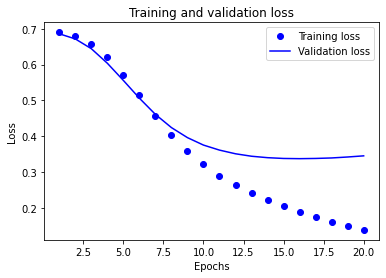

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Training and validation loss 그래프를 통해 적정 epoch 단계를 추정 가능하다  
validation loss와 train loss가 이격이 발생하면 그 이상의 훈련은 무의미하다

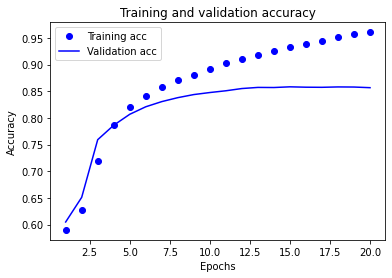

In [ ]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Training and validation accuracy 역시 유사한 인사이트를 얻을 수 있다

## 6.8 Word2Vec의 적용

`워드 임베딩(word embedding)`  
단어의 특성을 저차원 벡터값으로 표현 가능한 기법  
감성분석 방식의 라벨링 비용을 절감하면서 정확도를 크게 향상시킬 수 있음


In [ ]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [ ]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = 'D:/project/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w', encoding='utf-8') # 인코딩 에러가 발생하여 encoding='utf-8' 옵션 추가
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

`'cp949' codec can't encode ... ` 어쩌고 encoding error  
파이썬의 기본 설정이 utf-8이 아니라서 비-영어권 사용자들은 코딩할때 별도의 옵션을 설정해야 오류가 안난다고 한다.  
해결방법  
`file=open('파일명','w',encoding='UTF-8')`

`gensim` 에서 제공하는 패키지를 이용해, 위에 남긴 임베딩 파라미터를 읽어서 word vector로 활용할 수 있습니다.

In [ ]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['computer']
vector

array([-0.01754055, -0.04434309, -0.01187165, -0.02456536, -0.04463724,
       -0.02891786, -0.01147646, -0.02144857, -0.01918643, -0.00886441,
       -0.02751042, -0.02217978, -0.02411162, -0.03451467, -0.0260361 ,
       -0.02103702], dtype=float32)

워드 벡터가 의미 벡터 공간상에 유의미하게 학습됐는지 확인하는 방법  
`gensim`을 활용해 단어를 하나 주고 그와 가장 유사한 단어와 그 유사도를 확인하기 

In [ ]:
word_vectors.similar_by_word("love")

[('minor', 0.9858551025390625),
 ('moving', 0.9823207259178162),
 ('gives', 0.9814017415046692),
 ('premiered', 0.9694541692733765),
 ('explosions', 0.9666252732276917),
 ('occurs', 0.966166079044342),
 ('wide', 0.963441789150238),
 ('strong', 0.96340411901474),
 ('span', 0.9590501189231873),
 ('interpretation', 0.9583466649055481)]

우리가 다룬 정도의 훈련 데이터로는 워드 벡터를 정교하게 학습시키기 어려움  

구글에서 제공하는 `Word2Vec` 이라는 사전학습된(Pretrained) 워드 임베딩 모델 사용  
`Word2Vec`?
* 1억 개의 단어로 구성된 Google News dataset을 바탕으로 학습
* 총 300만 개의 단어를 각각 300차원의 벡터로 표현한 것

사전학습된 임베딩을 활용하는 것은 `전이학습`으로 인해 아주 유리하다. 

```
Q10. 사전에 학습된 Word2Vec 등의 임베딩 모델을 활용하는 전이학습(Transfer Learning)이 유리한 이유를 설명해 보세요.
A10. 사람도 무언가를 배우기 위해 제로베이스에서 시작하지 않고 자신이 지닌 이전의 경험과 지식을 동원하는 것처럼, 광범위한 데이터를 통해 미리 학습해 놓은 임베딩 속에 녹아 있는 의미, 문법 등의 부가적인 정보를 내가 만들려는 모델이 활용할 수 있는 피처로 활용하는 것이 훨씬 빠르고 정확하게 학습할 수 있는 방법이 된다.
```



In [ ]:
from gensim.models import KeyedVectors

word2vec_path = 'D:/project/sentiment_classification/data/GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=None)
vector = word2vec['computer']
vector     # 무려 300dim의 워드 벡터입니다.

array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

300만개의 단어를 모두 메모리에 로딩하면 메모리 에러가 발생할 확률이 높음  
``KeyedVectors.load_word2vec_format`` 메서드로 워드 벡터를 로딩할 때 가장 많이 사용되는 상위 100만 개만 limt으로 조건을 주어 로딩  
-> 메모리가 충분하다면 `limt=None`으로 설정

In [ ]:
# 메모리를 다소 많이 소비하는 작업이니 유의해 주세요.
word2vec.similar_by_word("love")

[('loved', 0.6907791495323181),
 ('adore', 0.6816873550415039),
 ('loves', 0.661863386631012),
 ('passion', 0.6100708842277527),
 ('hate', 0.6003956198692322),
 ('loving', 0.5886635780334473),
 ('Ilove', 0.5702950954437256),
 ('affection', 0.5664337873458862),
 ('undying_love', 0.5547305345535278),
 ('absolutely_adore', 0.5536840558052063)]

이전보다 의미적 유사도가 가까움.  
이전 학습에서 사용한 모델의 임베딩 레이어를 `Word2Vec`으로 교체

In [ ]:
vocab_size = 30000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원수
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

In [ ]:
from tensorflow.keras.initializers import Constant

vocab_size = 30000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원 수 

# 모델 구성
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 580, 300)          9000000   
                                                                 
 conv1d_2 (Conv1D)           (None, 574, 16)           33616     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 114, 16)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 108, 16)           1808      
                                                                 
 global_max_pooling1d_4 (Glo  (None, 16)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_10 (Dense)            (None, 8)                

In [ ]:
# 학습의 진행
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/10
30/30 [==============================] - 27s 593ms/step - loss: 0.6911 - accuracy: 0.5261 - val_loss: 0.6837 - val_accuracy: 0.5666
Epoch 2/10
30/30 [==============================] - 17s 569ms/step - loss: 0.6743 - accuracy: 0.5861 - val_loss: 0.6586 - val_accuracy: 0.6176
Epoch 3/10
30/30 [==============================] - 14s 460ms/step - loss: 0.6169 - accuracy: 0.6776 - val_loss: 0.5872 - val_accuracy: 0.7037
Epoch 4/10
30/30 [==============================] - 13s 423ms/step - loss: 0.4686 - accuracy: 0.8007 - val_loss: 0.4139 - val_accuracy: 0.8190
Epoch 5/10
30/30 [==============================] - 16s 525ms/step - loss: 0.3157 - accuracy: 0.8737 - val_loss: 0.3470 - val_accuracy: 0.8468
Epoch 6/10
30/30 [==============================] - 18s 590ms/step - loss: 0.2243 - accuracy: 0.9171 - val_loss: 0.3257 - val_accuracy: 0.8626
Epoch 7/10
30/30 [==============================] - 16s 547ms/step - loss: 0.1628 - accuracy: 0.9452 - val_loss: 0.3256 - val_accuracy: 0.8651

In [ ]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


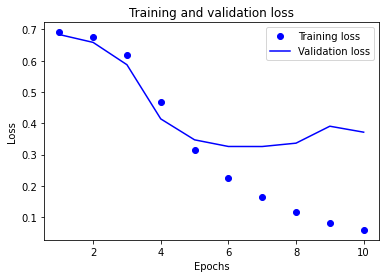

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# 테스트셋을 통한 모델 평가
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

## 6.9 프로젝트 : 네이버 영화리뷰 감성분석

네이버 영화의 댓글을 모아 구성된 Naver sentiment movie corpus
https://github.com/e9t/nsmc



### 0. 루브릭
***

### 1. 데이터 준비와 확인
***

In [ ]:
import pandas as pd
import sys
sys.path.append('C:\\Users\\Helpe\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages')


# 데이터를 읽어봅시다. 
train_data = pd.read_table('D:/project/sentiment_classification/data/nsmc-master/ratings_train.txt')
test_data = pd.read_table('D:/project/sentiment_classification/data/nsmc-master/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


### 2. 데이터로더 구성
***
nsmc 데이터셋은 IMDB에서 제공했던 숫자 인덱스로 변환된 텍스트와 `word_to_index` 딕셔너리가 없다.  
가공되지 않은 텍스트 파일들을 `imdb.data_loader()`와 동일하게 동작하는 자신만의 `data_loader`를 만들어 보는 것으로 시작함

* 데이터의 중복 제거
* NaN 결측치 제거
* 한국어 토크나이저로 토큰화
* 불용어(Stopwords) 제거
* 사전word_to_index 구성
* 텍스트 스트링을 사전 인덱스 스트링으로 변환
* X_train, y_train, X_test, y_test, word_to_index 리턴

In [ ]:

from eunjeon import Mecab #
import numpy as np
from collections import Counter

tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['', '', '', ''] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index
    
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data) 


`Install MeCab in order to use it: http://konlpy.org/en/latest/install/` 오류발생

페이지에 들어가니 Warning: KoNLPy’s Mecab() class is not supported on Windows machines. 문구..

* 자바 jdk 설치
* 시스템에서 JAVA_HOME 설정 
* PATH에서 자바 경로 추가 
* JPye 설치
* Konlpy 설치
-> 여기까지 진행했으나 java를 인식하지 못함
* 아나콘다가 설치된 경로로 가서 jpype_jvmfinder.py에서 직접 환경변수 경로 설정
-> 드디어 jdk가 작동

jdk 오류를 해결하자 `Install MeCab in order to use it` 오류 발생...


In [ ]:
index_to_word = {index:word for word, index in word_to_index.items()}


In [ ]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다. 
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]